# Uber ride share report

### Importing modules

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Csv path

In [2]:
csv_path_ride_data = os.path.join('raw_data','ride_data.csv')
csv_path_city_data = os.path.join('raw_data','city_data.csv')

### Loading into DataFrames

In [3]:
rides_df = pd.read_csv(csv_path_ride_data)
cities_df = pd.read_csv(csv_path_city_data)

## Data Cleaning

### Rides DataFrame Cleaning

#### Check for the number of rows

In [4]:

rides_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

#### Drop columns with no data

In [5]:
rides_df = rides_df.dropna(how='any')

rides_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

#### Check for repeats

In [6]:
# check for repeating cities
print("Length of Value Counts: {}".format(len(rides_df['city'].value_counts())))
print('Length of Unique Cities: {}'.format(len(rides_df['city'].unique())))

Length of Value Counts: 125
Length of Unique Cities: 125


### Cities DataFrame Cleaning

#### Check for the number of rows

In [7]:
# check for number of rows
cities_df.count()

city            126
driver_count    126
type            126
dtype: int64

#### Drop columns with no data

In [8]:
# drop the empty rows and then do a count
cities_df = cities_df.dropna(how='any')

cities_df.count()

city            126
driver_count    126
type            126
dtype: int64

#### Check for repeats

In [9]:
# check for repeat cities
print("Length of Value Counts: {}".format(len(cities_df['city'].value_counts())))
print('Length of Unique Cities: {}'.format(len(cities_df['city'].unique())))

Length of Value Counts: 125
Length of Unique Cities: 125


### Display: Cities

In [10]:
cities_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


### Display: Rides

In [11]:
rides_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


### Display: Uber Data(mixing `cities` and `rides` data)

In [12]:
uber_df = pd.merge(rides_df,cities_df,on='city',how="left")
uber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


### Bubble Plot
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

#### Bubble Plot: Step One: Perform and contain the calculation

In [13]:
# setting up x,y,size for urban
urban_df = uber_df.loc[uber_df['type'] == 'Urban']
avg_price_city_u = urban_df.groupby('city').mean()['fare']
rides_per_city_u = urban_df.groupby('city').count()['ride_id']
driver_per_city_u = urban_df.groupby('city').mean()['driver_count']

# setting up x,y,size for rural
rural_df = uber_df.loc[uber_df['type'] == 'Rural']
avg_price_city_r = rural_df.groupby('city').mean()['fare']
rides_per_city_r = rural_df.groupby('city').count()['ride_id']
driver_per_city_r = rural_df.groupby('city').mean()['driver_count']

# setting up x,y,size for suburban
suburban_df = uber_df.loc[uber_df['type'] == 'Suburban']
avg_price_city_s = suburban_df.groupby('city').mean()['fare']
rides_per_city_s = suburban_df.groupby('city').count()['ride_id']
driver_per_city_s = suburban_df.groupby('city').mean()['driver_count']

#### Bubble Plot: Step Two: Put it into a DataFrame

In [14]:
# put into a DF: urban
urban_buble = pd.DataFrame({
    'y': avg_price_city_u,
    'x' : rides_per_city_u,
    's':driver_per_city_u
})

# put into a DF: rural
rural_buble = pd.DataFrame({
    'y': avg_price_city_r,
    'x' : rides_per_city_r,
    's':driver_per_city_r
})

# put into a DF: suburban
suburban_buble = pd.DataFrame({
    'y': avg_price_city_s,
    'x' : rides_per_city_s,
    's':driver_per_city_s
})

#### Bubble Plot: Step Three: Graph the chart and style it

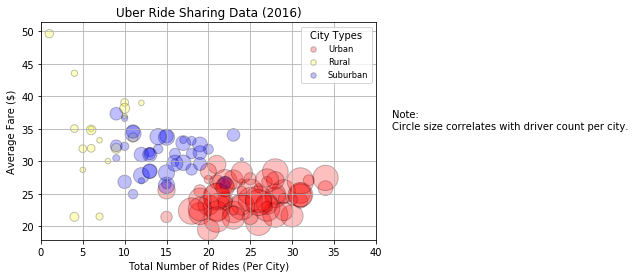

In [22]:
# graph: urban
plt.scatter(urban_buble['x'],
            urban_buble['y'],
            marker="o", 
            facecolors="red",
            edgecolors="black",
            s=10 *urban_buble['s'],
            alpha=0.25,
            label = 'Urban')

# graph: rural
plt.scatter(rural_buble['x'],
            rural_buble['y'],
            marker="o", 
            facecolors="yellow",
            edgecolors="black",
            s=10 *rural_buble['s'],
            alpha=0.25,
            label = 'Rural')

# graph: suburban
plt.scatter(suburban_buble['x'],
            suburban_buble['y'],
            marker="o", 
            facecolors="blue",
            edgecolors="black",
            s= 10 *suburban_buble['s'],
            alpha=0.25,
            label = 'Suburban')

# Incorporate the other graph properties
plt.title("Uber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Show plot
plt.show()

### Pie Chart: % of Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

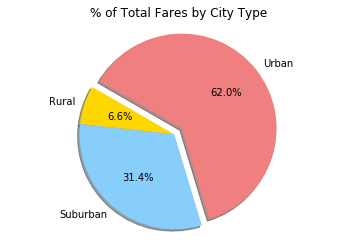

In [16]:
# calculation
total_fare = uber_df['fare'].sum()
city_type_fare = uber_df.groupby('type').sum()['fare']

# dataframe
pc_1 = pd.DataFrame({
    '% of Total Fares by City Type': round((city_type_fare/total_fare)*100,1)
})

# style
labels = ['Rural','Suburban','Urban']
colors=["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
sizes = pc_1['% of Total Fares by City Type'] 

# graph
plt.pie(sizes, 
        explode=explode,
        labels=labels, 
        colors=colors, 
        autopct="%1.1f%%",
        shadow=True,
        startangle=150)

plt.axis("equal")
plt.title('% of Total Fares by City Type')

### Pie Chart: % of Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

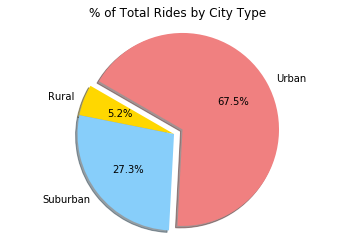

In [17]:
# calculation
total_rides = uber_df['ride_id'].count()
city_type_rides = uber_df.groupby('type').count()['ride_id']

# dataframe 
pc_2 = pd.DataFrame({
    '% of Total Rides by City Type': round((city_type_rides/total_rides)*100,1)
})

# style
labels = ['Rural','Suburban','Urban']
colors=["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
sizes = pc_2['% of Total Rides by City Type'] 

# graph
plt.pie(sizes, 
        explode=explode,
        labels=labels, 
        colors=colors, 
        autopct="%1.1f%%",
        shadow=True,
        startangle=150)

plt.axis("equal")
plt.title('% of Total Rides by City Type')

Text(0.5,1,'% of Total Drivers by City Type')

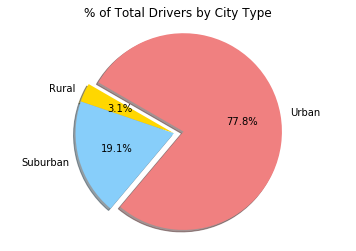

In [18]:
# calculation
total_drivers = cities_df['driver_count'].sum()
city_type_drivers = cities_df.groupby('type').sum()['driver_count']

# dataframe
pc_3 = pd.DataFrame({
    '% of Total Drivers by City Type': round((city_type_drivers/total_drivers)*100,1)
})
pc_3

# style
labels = ['Rural','Suburban','Urban']
colors=["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
sizes = pc_3['% of Total Drivers by City Type'] 

# graph
plt.pie(sizes, 
        explode=explode,
        labels=labels, 
        colors=colors, 
        autopct="%1.1f%%",
        shadow=True,
        startangle=150)

plt.axis("equal")
plt.title('% of Total Drivers by City Type')